# Author: MD Fakrul Islam, fakrul.islam@tsi.com.bd
# Import Necessery Library

In [6]:
import os, sys, math, time
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.14.0


# SET Image Dimension
# Model developed by images of (224,224) dimension is suitable for High Processor and Ram, Mean Validation Accuracy ~ 98%.
# Model developed by images of (32,32) Dimension is suitable for intel dev cloude edge platform for optimization using intel distributed openvino toolkit, Mean Validation Accuracy ~ 90%-92%.
# Create folder of names 32, 64, 128 and 224 under the Model Folder to create models of similar dimension. Image of 32*32 dimension has been shown in this codebase.
# Select right dimension that is suitable for your workstation(PROCESSOR and RAM)

In [7]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]
print('Image Dimension Loaded')

Image Dimension Loaded


# Set Training and Validation IMAGE Path
# Set Saved Keras Model Path
# Set Saved Tensorflow Model Path

In [8]:
#Training Images
TRAIN_EarlyBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/train/EarlyBlight'
TRAIN_LateBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/train/LateBlight'
TRAIN_LeafCurl_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/train/LeafCurl'
TRAIN_LeafMold_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/train/LeafMold'
TRAIN_Healthy_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/train/Healthy'

#Validating Images
VALIDATE_EarlyBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/val/EarlyBlight'
VALIDATE_LateBlight_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/val/LateBlight'
VALIDATE_LeafCurl_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/val/LeafCurl'
VALIDATE_LeafMold_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/val/LeafMold'
VALIDATE_Healthy_LOCATION_IMAGES='/home/fakrul/Documents/PlantPathology/Tomato/val/Healthy'

#Saved Keras Model Path
KERAS_PATH = '/home/fakrul/Documents/PlantPathology/Model/64/keras/tomato.h5'

#Saved TensorFlow Model Path
TensorFlow_PATH='/home/fakrul/Documents/PlantPathology/Model/64/tf'

print('All Path Loaded')

All Path Loaded


# Load all Training and Validation IMAGES path in the memory

In [9]:
from os.path import join
from glob import glob

TrainEarlyBlightFiles = []
ValEarlyBlightFiles = []

TrainLateBlightFiles = []
ValLateBlightFiles = []

TrainLeafCurlFiles = []
ValLeafCurlFiles = []

TrainLeafMoldFiles = []
ValLeafMoldFiles = []

TrainHealthyFiles = []
ValHealthyFiles = []

def getListSize(itel_list):
    count = 0
    for img_path in itel_list:  
        count = count + 1
    return count

for ext in ('*.JPEG', '*.JPG', '*.jpg', 'jpeg'):
   TrainEarlyBlightFiles.extend(glob(join(TRAIN_EarlyBlight_LOCATION_IMAGES, ext)))
   ValEarlyBlightFiles.extend(glob(join(VALIDATE_EarlyBlight_LOCATION_IMAGES, ext)))
   TrainLateBlightFiles.extend(glob(join(TRAIN_LateBlight_LOCATION_IMAGES, ext)))
   ValLateBlightFiles.extend(glob(join(VALIDATE_LateBlight_LOCATION_IMAGES, ext)))
   TrainHealthyFiles.extend(glob(join(TRAIN_Healthy_LOCATION_IMAGES, ext)))
   ValHealthyFiles.extend(glob(join(VALIDATE_Healthy_LOCATION_IMAGES, ext)))
   TrainLeafCurlFiles.extend(glob(join(TRAIN_LeafCurl_LOCATION_IMAGES, ext)))
   ValLeafCurlFiles.extend(glob(join(VALIDATE_LeafCurl_LOCATION_IMAGES, ext)))
   TrainLeafMoldFiles.extend(glob(join(TRAIN_LeafMold_LOCATION_IMAGES, ext)))
   ValLeafMoldFiles.extend(glob(join(VALIDATE_LeafMold_LOCATION_IMAGES, ext)))

print('Total Train EarlyBlight Files:',getListSize(TrainEarlyBlightFiles))
print('Total Validate EarlyBlight Files:',getListSize(ValEarlyBlightFiles))
print('Total Train LateBlight Files:',getListSize(TrainLateBlightFiles))
print('Total Validate LateBlight Files:',getListSize(ValLateBlightFiles))
print('Total Train Healthy Files:',getListSize(TrainHealthyFiles))
print('Total Validate Healthy Files:',getListSize(ValHealthyFiles))
print('Total Leaf Curl Files:',getListSize(TrainLeafCurlFiles))
print('Total Validate Leaf Curl Files:',getListSize(ValLeafCurlFiles))
print('Total Leaf Mold Files:',getListSize(TrainLeafMoldFiles))
print('Total Validate Leaf Mold Files:',getListSize(ValLeafMoldFiles))

print('All image path loaded')

Total Train EarlyBlight Files: 4285
Total Validate EarlyBlight Files: 1072
Total Train LateBlight Files: 4284
Total Validate LateBlight Files: 1072
Total Train Healthy Files: 4285
Total Validate Healthy Files: 1072
Total Leaf Curl Files: 4285
Total Validate Leaf Curl Files: 1072
Total Leaf Mold Files: 4285
Total Validate Leaf Mold Files: 1072
All image path loaded


# Features Extraction using Training Dataset(TX,TY)

In [10]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
from keras.applications import vgg16

print("Tensorflow version " + tf.__version__)

images = []
labels = []

count=0
print(TRAIN_EarlyBlight_LOCATION_IMAGES)
# Load all tomato earlyblight images
for IMAGE_PATH in TrainEarlyBlightFiles:
    count = count + 1   
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'leaf mold' image, the expected value should be 0
    labels.append(0)
print('Total Images :'+ str(count))

count=0
print(TRAIN_LateBlight_LOCATION_IMAGES)
# Load all tomato lateblight images
for IMAGE_PATH in TrainLateBlightFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(1)
print('Total Images :'+ str(count))

count=0
print(TRAIN_LeafCurl_LOCATION_IMAGES)
# Load all tomato leafcurl images
for IMAGE_PATH in TrainLeafCurlFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(2)
print('Total Images :'+ str(count))

count=0
print(TRAIN_LeafMold_LOCATION_IMAGES)
# Load all tomato leafmold images
for IMAGE_PATH in TrainLeafMoldFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(3)
print('Total Images :'+ str(count))

count=0
print(TRAIN_Healthy_LOCATION_IMAGES)
# Load all tomato healthy images
for IMAGE_PATH in TrainHealthyFiles:
    # Load the image from disk
    count= count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labels.append(4)
print('Total Images :'+ str(count))

# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

# Normalize image data to 0-to-1 range
#x_train = vgg16.preprocess_input(x_train)
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)

Using TensorFlow backend.


Tensorflow version 1.14.0
/home/fakrul/Documents/PlantPathology/Tomato/train/EarlyBlight
Total Images :4285
/home/fakrul/Documents/PlantPathology/Tomato/train/LateBlight
Total Images :4284
/home/fakrul/Documents/PlantPathology/Tomato/train/LeafCurl
Total Images :4285
/home/fakrul/Documents/PlantPathology/Tomato/train/LeafMold
Total Images :4285
/home/fakrul/Documents/PlantPathology/Tomato/train/Healthy
Total Images :4285


# Features Extraction using Validation(VX, VY) Dataset

In [11]:
imagesv = []
labelsv = []

count =0 
print(VALIDATE_EarlyBlight_LOCATION_IMAGES)
# Load all tomato earlyblight val images
for IMAGE_PATH in ValEarlyBlightFiles:
    count = count + 1    
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)

    # For each 'leaf mold' image, the expected value should be 0
    labelsv.append(0)
print('Total Images :'+ str(count))

count = 0
print(VALIDATE_LateBlight_LOCATION_IMAGES)
# Load all tomato lateblight val images
for IMAGE_PATH in ValLateBlightFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labelsv.append(1)
print('Total Images :'+ str(count))

count =0 
print(VALIDATE_LeafCurl_LOCATION_IMAGES)
# Load all tomato leafcurl val images
for IMAGE_PATH in ValLeafCurlFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labelsv.append(2)
print('Total Images :'+ str(count))

count = 0
print(VALIDATE_LeafMold_LOCATION_IMAGES)
# Load all tomato leafmold val images
for IMAGE_PATH in ValLeafMoldFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labelsv.append(3)
print('Total Images :'+ str(count))


count=0
print(VALIDATE_Healthy_LOCATION_IMAGES)
# Load all tomato healthy val images
for IMAGE_PATH in ValHealthyFiles:
    # Load the image from disk
    count = count + 1
    img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add the image to the list of images
    imagesv.append(image_array)
    # For each 'leaf mold' image, the expected value should be 0
    labelsv.append(4)
print('Total Images :'+ str(count))

# Create a single numpy array with all the images we loaded
xv_train = np.array(imagesv)

# Also convert the labels to a numpy array
yv_train = np.array(labelsv)

# Normalize image data to 0-to-1 range
#x_train = vgg16.preprocess_input(x_train)
xv_train = tf.keras.applications.vgg16.preprocess_input(xv_train)

/home/fakrul/Documents/PlantPathology/Tomato/val/EarlyBlight
Total Images :1072
/home/fakrul/Documents/PlantPathology/Tomato/val/LateBlight
Total Images :1072
/home/fakrul/Documents/PlantPathology/Tomato/val/LeafCurl
Total Images :1072
/home/fakrul/Documents/PlantPathology/Tomato/val/LeafMold
Total Images :1072
/home/fakrul/Documents/PlantPathology/Tomato/val/Healthy
Total Images :1072


# Create the Model Based on VGG16

In [12]:
# Load a pre-trained neural network to use as a feature extractor

pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False


model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
model.input_shape

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 15,766,341
Trainable params: 1,051,653
Non-trainable params: 14,714,688
__________________________________________________

(None, 64, 64, 3)

# Train and Test The Model

In [13]:
start_time = time.time()
history=model.fit(
    x_train,
    y_train,    
    validation_data=(xv_train, yv_train),
    epochs=10,
    batch_size=128,
    shuffle=True
)
print("TRAINING TIME: ", time.time() - start_time, " sec")

Train on 21424 samples, validate on 5360 samples
Epoch 1/10
21424/21424 [==============================] - 220s 10ms/sample - loss: 1.6311 - acc: 0.7642 - val_loss: 0.3498 - val_acc: 0.8778
Epoch 2/10
21424/21424 [==============================] - 216s 10ms/sample - loss: 0.3784 - acc: 0.8677 - val_loss: 0.2774 - val_acc: 0.9006
Epoch 3/10
21424/21424 [==============================] - 234s 11ms/sample - loss: 0.2690 - acc: 0.9025 - val_loss: 0.2386 - val_acc: 0.9142
Epoch 4/10
21424/21424 [==============================] - 216s 10ms/sample - loss: 0.2258 - acc: 0.9195 - val_loss: 0.2034 - val_acc: 0.9299
Epoch 5/10
21424/21424 [==============================] - 219s 10ms/sample - loss: 0.1874 - acc: 0.9333 - val_loss: 0.2120 - val_acc: 0.9319
Epoch 6/10
21424/21424 [==============================] - 219s 10ms/sample - loss: 0.1601 - acc: 0.9448 - val_loss: 0.1922 - val_acc: 0.9351
Epoch 7/10
21424/21424 [==============================] - 217s 10ms/sample - loss: 0.1381 - acc: 0.9523 -

# Evaluate the model

In [14]:
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(xv_train, yv_train, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
5360/5360 [==============================] - 42s 8ms/sample - loss: 0.1786 - acc: 0.9468
test loss, test acc: [0.17860491704473744, 0.94682837]


In [15]:
final_accuracy = history.history["val_acc"][-5:]
print("FINAL ACCURACY MEAN-5(VGG16): ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5(VGG16):  0.9413433


In [16]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


# Train and Test Accuracy Graph

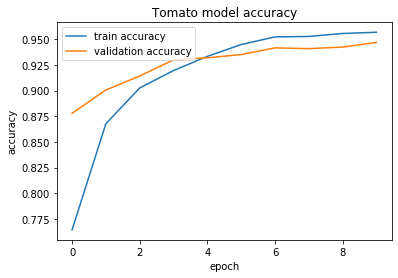

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Tomato model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Train and Test Loss Graph

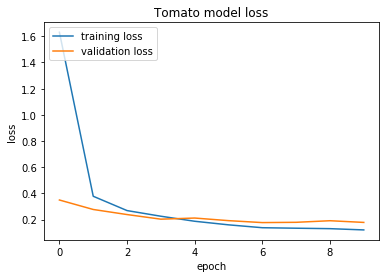

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Tomato model loss')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Save the KERAS model and check the shape

In [19]:
print(KERAS_PATH)
model.save(KERAS_PATH) 
# Recreate the exact same model, including its weights and the optimizer
saved_model = tf.keras.models.load_model(KERAS_PATH)

# Show the model architecture
saved_model.summary()
saved_model.input_shape

/home/fakrul/Documents/PlantPathology/Model/64/keras/tomato.h5
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)      

(None, 64, 64, 3)

# Saved Keras Model to Tensorflow Model Conversion

In [20]:
import tensorflow as tf
import tensorflow.keras.backend as K

K.set_learning_phase(0)


model_name = 's_tomato_tensorflowmodel'

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph




frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in saved_model.outputs], 
                              clear_devices=True)

tf.train.write_graph(frozen_graph, TensorFlow_PATH, model_name+".pb", as_text=False)

output_model_name = model_name + ".pb"
output_model_path = TensorFlow_PATH + output_model_name

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 86 variables.
INFO:tensorflow:Converted 86 variables to const ops.


# In memory Keras Model to TensorFlow Model Conversion

In [21]:
import tensorflow as tf
import tensorflow.keras.backend as K

K.set_learning_phase(0)


model_name = 'm_tomato_tensorflowmodel'

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph




frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs], 
                              clear_devices=True)

tf.train.write_graph(frozen_graph, TensorFlow_PATH, model_name+".pb", as_text=False)

output_model_name = model_name + ".pb"
output_model_path = TensorFlow_PATH + output_model_name

INFO:tensorflow:Froze 86 variables.
INFO:tensorflow:Converted 86 variables to const ops.
